In [38]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import models,layers
from keras.datasets import cifar10

In [39]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [40]:
x_train.shape

(50000, 32, 32, 3)

In [44]:
y_train.shape

(50000, 1)

In [43]:
x_test.shape

(10000, 32, 32, 3)

In [42]:
y_test.shape

(10000, 1)

In [46]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [59]:
def plot_sample(x,y,index):
  y_sample = y.reshape(-1,)
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y_sample[index]])

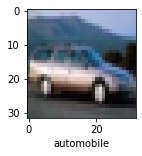

In [48]:
plot_sample(x_train, y, 4)

In [49]:
x_train = x_train /255.0

In [50]:
x_test = x_test /255.0

**TRAINING WITH FEED FARWORD NEURAL NETWORK**

In [51]:
ann = models.Sequential([
    
        layers.Flatten(input_shape = (32, 32, 3)),
        layers.Dense(3000, activation = 'relu'),
        layers.Dense(1000, activation = 'relu'),
        layers.Dense(10, activation = 'sigmoid'),
        
    ])

In [52]:
ann.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'SGD',
    metrics = ["accuracy"],  
)

In [53]:
ann.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.8110 - accuracy: 0.3548
Epoch 2/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6205 - accuracy: 0.4298
Epoch 3/5
1563/1563 [==============================] - 60s 39ms/step - loss: 1.5404 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4806 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4316 - accuracy: 0.4952


In [54]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 1.4534 - accuracy: 0.4817


[1.4534116983413696, 0.48170000314712524]

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report : \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 16ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.47      0.60      0.53      1000
           1       0.69      0.51      0.58      1000
           2       0.32      0.45      0.37      1000
           3       0.42      0.24      0.30      1000
           4       0.43      0.39      0.41      1000
           5       0.47      0.27      0.34      1000
           6       0.45      0.67      0.54      1000
           7       0.66      0.44      0.53      1000
           8       0.50      0.71      0.59      1000
           9       0.55      0.56      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



****

**TRAINING WITH CONVOLUTION NEURAL NETWORK**

In [56]:
cnn = models.Sequential([
      # cnn
      layers.Conv2D(filters = 32,  kernel_size = (3, 3), activation = 'relu', input_shape = ( 32, 32, 3)),
      layers.MaxPool2D((2, 2)),
      layers.Conv2D(filters = 32,  kernel_size = (3, 3), activation = 'relu', input_shape= ( 32, 32, 3)),
      layers.MaxPool2D((2, 2)),
      # dense
      layers.Flatten(),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(10, activation = 'softmax'),
        
    ])

In [57]:
cnn.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"],  
)

In [58]:
cnn.fit(x_train, y_train, batch_size = 64, epochs = 15)

Epoch 1/15
782/782 [==============================] - 33s 42ms/step - loss: 1.5854 - accuracy: 0.4310
Epoch 2/15
782/782 [==============================] - 36s 46ms/step - loss: 1.2572 - accuracy: 0.5591
Epoch 3/15
782/782 [==============================] - 33s 42ms/step - loss: 1.1285 - accuracy: 0.6049
Epoch 4/15
782/782 [==============================] - 40s 51ms/step - loss: 1.0383 - accuracy: 0.6373
Epoch 5/15
782/782 [==============================] - 32s 41ms/step - loss: 0.9782 - accuracy: 0.6589
Epoch 6/15
782/782 [==============================] - 32s 41ms/step - loss: 0.9340 - accuracy: 0.6757
Epoch 7/15
782/782 [==============================] - 32s 41ms/step - loss: 0.8982 - accuracy: 0.6859
Epoch 8/15
782/782 [==============================] - 32s 41ms/step - loss: 0.8640 - accuracy: 0.7007
Epoch 9/15
782/782 [==============================] - 32s 41ms/step - loss: 0.8351 - accuracy: 0.7110
Epoch 10/15
782/782 [==============================] - 33s 42ms/step - loss: 0.802

In [60]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.9641 - accuracy: 0.6816


[0.9641252756118774, 0.6815999746322632]

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report : \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 9ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.62      0.70      1000
           1       0.89      0.67      0.76      1000
           2       0.57      0.59      0.58      1000
           3       0.48      0.54      0.51      1000
           4       0.62      0.66      0.64      1000
           5       0.61      0.56      0.59      1000
           6       0.67      0.84      0.74      1000
           7       0.78      0.72      0.75      1000
           8       0.80      0.80      0.80      1000
           9       0.69      0.82      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

